In [0]:
import torch
from torch.nn import functional
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [0]:
conv2d = lambda im , kr , pd = 0: functional.conv2d(torch.tensor(im[None,None]),
                                                    torch.tensor(kr[None,None]),
                                                    padding = pd).numpy().squeeze()

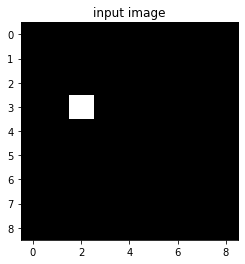

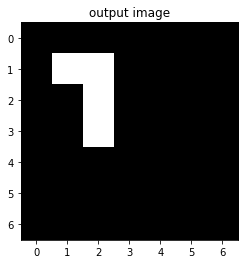

In [12]:
%matplotlib inline
img1 = np.array([[0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,1,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0],
                 [0,0,0,0,0,0,0,0,0]])

kernel1 = np.array([[1,0,0],
	                [1,0,0],
	                [1,1,0]])
plt.imshow(img1 , cmap = "Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img1, kernel1) , cmap = "Greys_r")
plt.title("output image")
plt.show()

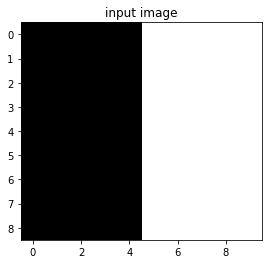

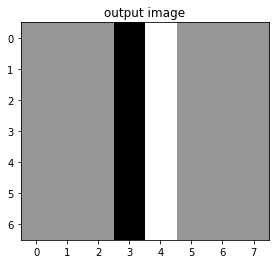

In [13]:
img2 =np.array([[0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1],
                [0,0,0,0,0,1,1,1,1,1]])

kernel2 = np.array([[-1,-1,-1],
	                  [-1, 8,-1],
	                  [-1,-1,-1]])
plt.imshow(img2,cmap = "Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img2, kernel2),cmap = "Greys_r")
plt.title("output image")
plt.show()

The image above is shrinked from its original shape and the excess area is shown in grey colour

# Need of padding
as clear from above two implementation of the conv2d function, the output image's shape is somewhat diminished. to handle this we add some extra elements to the image at its end point so that the output image have right shape.

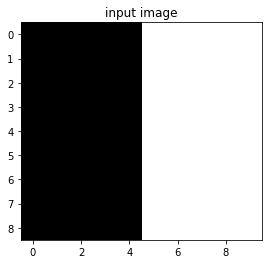

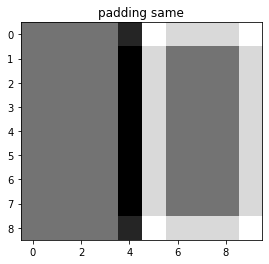

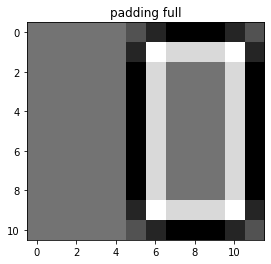

In [14]:
plt.imshow(img2 , cmap = "Greys_r")
plt.title("input image")
plt.show()

plt.imshow(conv2d(img2 , kernel2 , 1) , cmap = "Greys_r")
plt.title("padding same")
plt.show()

plt.imshow(conv2d(img2 , kernel2 , 2), cmap= "Greys_r")
plt.title("padding full")
plt.show()

from the image plots this looks like that in "padding same" we can detect only one of the boundries....but in full case we are detecting the borders also.

# padding size
for "padding same" the pad size needs to be (n-1)/2 X (m-1)/2
while for "padding full" the padding size needs to be (n+1)/2 X (m+1)/2 

In [15]:
#input size = [mini_batch,in_channels,img_height,img_width]
img = np.random.rand(10,5,21,19)
#kernel size = [out_channels,in_channels,kernel_height,kernel_width]
kernel = np.random.rand(3,5,5,7)
desired = functional.conv2d(torch.tensor(img),torch.tensor(kernel)).numpy().squeeze()
#output size = [mini_batch,out_channels,img_height,img_width]
desired.shape

(10, 3, 17, 13)

the code below shows what the torch inbuilt function.conv2d is doing in a fraction of second.

In [0]:
def conv2d_stack(im,kr):
  batch_size,in_channels,im_h,im_w = im.shape
  out_channels,_,kr_h,kr_w = kr.shape
  r = np.zeros((batch_size,out_channels,im_h-kr_h+1,im_w-kr_w+1))
  for i in range(batch_size):
    for j in range(out_channels):
      for k in range(in_channels):
        r[i,j]+= conv2d(im[i,k],kr[j,k])
  return r 

In [17]:
np.isclose(conv2d_stack(img, kernel), desired).all()

True

In [19]:
#[batch,feature_map_in,im_h,im_w]
img = np.random.rand(40, 20, 21, 21)
#[feature_map_out,feature_map_in,kr_h,kr_w]
kernel = np.random.rand(10, 20, 5, 5)

%time desired = functional.conv2d(torch.tensor(img),torch.tensor(kernel)).numpy().squeeze()
%time r = conv2d_stack(img,kernel)

CPU times: user 18.1 ms, sys: 34.3 ms, total: 52.3 ms
Wall time: 52.7 ms
CPU times: user 415 ms, sys: 11.8 ms, total: 426 ms
Wall time: 427 ms
